<a href="https://colab.research.google.com/github/pavan9130/TigerAnalyticsCaseStudy/blob/main/F%26B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning for EDA 1 and 2

**Importing All Excel sheets**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
product_Launch = pd.read_excel('/content/Product Launch Dataset.xlsm')
flavor_grouping = pd.read_excel('/content/Flavour classification dataset.xlsm')
positioning_grp=pd.read_excel('/content/Position category mapping dataset.xlsm')

In [ ]:
product_Launch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114689 entries, 0 to 114688
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Product id          114689 non-null  int64         
 1   Flavor              112713 non-null  object        
 2   Market Subcategory  114689 non-null  object        
 3   Launch Date         114689 non-null  datetime64[ns]
 4   Country             114689 non-null  object        
 5   Region              114689 non-null  object        
 6   Positioning         110377 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.1+ MB


In [ ]:
product_Launch_subset=product_Launch[['Product id','Flavor','Market Subcategory','Launch Date','Country','Region']]

In [ ]:
product_Launch_subset.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe
1,2,"Fruit, not specified",Carbonates,2001-01-01,WE2,West Europe
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,2001-01-01,WE2,West Europe
3,4,Mango; Passion Fruit,Juice & Juice Drinks,2001-01-01,WE2,West Europe
4,5,Mango,Juice & Juice Drinks,2001-01-01,WE2,West Europe


**Spliting ';' Separated flavor column**

In [ ]:
s=product_Launch_subset['Flavor'].str.split(';').apply(pd.Series,1).stack()
s.index=s.index.droplevel(-1)
s.name='Flavor'
del product_Launch_subset['Flavor']
product_Launch_subset=product_Launch_subset.join(s)
product_Launch_subset.head(5)

,Product id,Market Subcategory,Launch Date,Country,Region,Flavor
0,1,Other Soft Drinks,2001-01-01,WE1,West Europe,"Herbs, not specified"
0,1,Other Soft Drinks,2001-01-01,WE1,West Europe,"Fruit, not specified"
1,2,Carbonates,2001-01-01,WE2,West Europe,"Fruit, not specified"
2,3,Juice & Juice Drinks,2001-01-01,WE2,West Europe,Lemon
2,3,Juice & Juice Drinks,2001-01-01,WE2,West Europe,Honey


**Editing Flavor Column Values to Match Flavor values in Flavor Mapping dataset**

**List of String Changes**

Berry, Berry, Blackberry--->Berry, Blackberry

Berry, Aronia (Chokeberry(--->Berry, Aronia (Chokeberry)

Berry, Cowberry--->Berry, Crowberry

Raspberry--->Raspberry, Not specified

pink graptefruit --->Grapefruit, Pink

Grains, matcha--->Tea, matcha

Boysenberry---->Berry, Boysenberry

Blueberry------>Berry, Blueberry

Elderberry--->Berry, Elderberry

Herb, rosemary--->Rosemary

Beans, soy--- Bean, Soy

Cactus-----Superfruit, Cactus

Tea,rooibos---Tea, rooibos 

Bloody Mary---Cocktail, Bloody Mary

Coffee, cafÃ© au lait------Coffee, Cafe au lait

Hogplum----Superfruit, Hogplum

Acerola---Superfruit, Acerola

Agave---Superfruit, Agave

Cherry, soar---Cherry, Sour

Berry,  Moringa---Berry, Moringa

Beans, chicory-----Bean, Chicory
Wildberry---Berry, Wildberry


In [ ]:
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Berry, Berry, Blackberry", "Flavor"] ='Berry, Blackberry'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Berry, Aronia (Chokeberry(", "Flavor"] ='Berry, Aronia (Chokeberry)'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Berry, Cowberry", "Flavor"] ='Berry, Crowberry'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Raspberry", "Flavor"] ='Raspberry, Not specified'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "pink graptefruit", "Flavor"] ='Grapefruit, Pink'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Grains, matcha", "Flavor"] ='Tea, matcha'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Boysenberry", "Flavor"] ='Berry, Boysenberry'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Blueberry","Flavor"] ='Berry, Blueberry'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Elderberry","Flavor"] ='Berry, Elderberry'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Herb, rosemary", "Flavor"] ='Rosemary'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Beans, soy", "Flavor"] ='Bean, Soy'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Cactus", "Flavor"] ='Superfruit, Cactus'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Tea,rooibos", "Flavor"] ='Tea, rooibos'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Bloody Mary","Flavor"] ='Cocktail, Bloody Mary'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Coffee, cafÃ© au lait","Flavor"] ='Coffee, Cafe au lait'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Hogplum", "Flavor"] ='Superfruit, Hogplum'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Acerola", "Flavor"] ='Superfruit, Acerola'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Agave", "Flavor"] ='Superfruit, Agave'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Cherry, soar", "Flavor"] ='Cherry, Sour'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Berry,  Moringa","Flavor"] ='Berry, Moringa'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Beans, chicory", "Flavor"] ='Bean, Chicory'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Pomegranate", "Flavor"] ='Superfruit, Pomegranate'
product_Launch_subset.loc[product_Launch_subset["Flavor"].str.strip() == "Pink Grapefruit", "Flavor"] ='Grapefruit, Pink'

In [ ]:
product_Launch_subset=product_Launch_subset.reset_index()

**Code to alter Flavor String 'Coffee, Cafe au lait'**

In [ ]:
for i in range(0,product_Launch_subset.shape[0]):
    if str(product_Launch_subset["Flavor"].loc[i]).startswith('Coffee, caf'):
       product_Launch_subset["Flavor"][i]='Coffee, Cafe au lait'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Adding Launch Year**

In [ ]:
product_Launch_subset['LaunchYear'] = pd.DatetimeIndex(product_Launch_subset['Launch Date']).year

**Changing flavor to lowercase and removing whitespaces**

In [ ]:
product_Launch_subset['Flavor']=product_Launch_subset['Flavor'].str.strip()
product_Launch_subset['Flavor_lower']=product_Launch_subset['Flavor'].str.lower().str.strip()
flavor_grouping['Flavor_lower']=flavor_grouping['Flavor'].str.lower().str.strip()

In [ ]:
flavor_grouping_subset=flavor_grouping[['Flavor_lower','Flavor_Group']]

In [ ]:
Dataset_1 = pd.merge(product_Launch_subset, flavor_grouping_subset, how='left', on = 'Flavor_lower')

In [ ]:
Dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167323 entries, 0 to 167322
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               167323 non-null  int64         
 1   Product id          167323 non-null  int64         
 2   Market Subcategory  167323 non-null  object        
 3   Launch Date         167323 non-null  datetime64[ns]
 4   Country             167323 non-null  object        
 5   Region              167323 non-null  object        
 6   Flavor              165347 non-null  object        
 7   LaunchYear          167323 non-null  int64         
 8   Flavor_lower        165347 non-null  object        
 9   Flavor_Group        164127 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 14.0+ MB


In [ ]:
Dataset_1_subset=Dataset_1[['Product id','Market Subcategory','Launch Date','LaunchYear','Country','Region','Flavor','Flavor_Group']]

In [ ]:
Dataset_1_subset.head()

,Product id,Market Subcategory,Launch Date,LaunchYear,Country,Region,Flavor,Flavor_Group
0,1,Other Soft Drinks,2001-01-01,2001,WE1,West Europe,"Herbs, not specified",Herbs
1,1,Other Soft Drinks,2001-01-01,2001,WE1,West Europe,"Fruit, not specified",Fruit
2,2,Carbonates,2001-01-01,2001,WE2,West Europe,"Fruit, not specified",Fruit
3,3,Juice & Juice Drinks,2001-01-01,2001,WE2,West Europe,Lemon,Fruit
4,3,Juice & Juice Drinks,2001-01-01,2001,WE2,West Europe,Honey,Brown Flavors


In [ ]:
Dataset_1_subset=Dataset_1_subset.drop_duplicates()

In [ ]:
Dataset_1_subset.to_csv('Dataset_EDA1&2.csv',sep='\t',index=False)

#Flavor Clustering

**SQL Code**

use tiger;

create TABLE product_launch (

Product_id INT,

Market_Subcategory VARCHAR(50),

Launch_Date DATE,

Launch_Year VARCHAR(10),

Country VARCHAR(20),

Region VARCHAR(20),

Flavor VARCHAR(200),

Flavor_group VARCHAR(200)

);

set global local_infile=true;

LOAD DATA  INFILE 'C:\\ProgramData\\MySQL\\MySQL Server 8.0\\Uploads\\Dataset_EDA1&2.csv'

INTO TABLE product_launch FIELDS TERMINATED BY '	' LINES TERMINATED BY '\n' 

IGNORE 1 LINES(Product_id,Market_Subcategory,Launch_Date,Launch_Year,Country,Region,Flavor,Flavor_group);



select Flavor

,count(  distinct case when Launch_Year='2001' then  product_id end) as '2001'

,count(  distinct case when Launch_Year='2002' then product_id end) as '2002'

,count(  distinct case when Launch_Year='2003' then product_id end) as '2003'

,count(  distinct case when Launch_Year='2004' then product_id end) as '2004'

,count(  distinct case when Launch_Year='2005' then product_id end) as '2005'

,count(  distinct case when Launch_Year='2006' then product_id end) as '2006'

,count(  distinct case when Launch_Year='2007' then product_id end) as '2007'

,count(  distinct case when Launch_Year='2008' then product_id end) as '2008'

,count(  distinct case when Launch_Year='2009' then product_id end) as '2009'

,count(  distinct case when Launch_Year='2010' then product_id end) as '2010'

from product_launch

where Flavor<>''

group by 1


In [ ]:
#Upload Flavor_Clustering.csv  exported result from sql

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
flavor_clustering = pd.read_csv('/content/Flavor_Clustering.csv')

In [ ]:
flavor_clustering.head()

,Flavor,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Acacia,0,0,0,0,1,0,0,2,2,3
1,Akee,0,0,1,0,0,0,0,0,0,0
2,Alfalfa,0,0,0,0,0,0,0,1,0,0
3,Allspice,0,0,0,0,0,0,1,1,1,1
4,Aloe Vera,37,40,55,77,85,102,163,153,184,198


In [ ]:
flavor_clustering_subset=flavor_clustering.iloc[:,1:]
flavor_clustering_subset.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,0,0,0,0,1,0,0,2,2,3
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,1,1,1
4,37,40,55,77,85,102,163,153,184,198


**finding ssc starting from 1 to 10 clusters**




In [ ]:
sse=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(flavor_clustering_subset)
    sse.append(kmeans.inertia_)

In [ ]:
import matplotlib.pyplot as plt

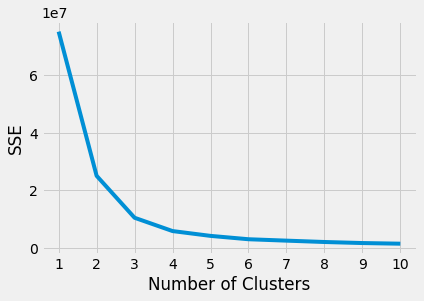

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11),sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

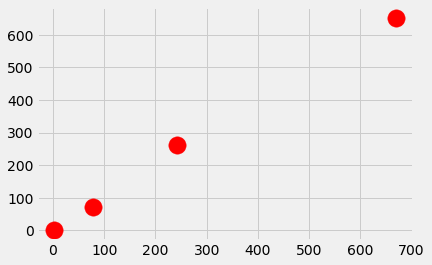

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(flavor_clustering_subset)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

**Adding Predictions back to dataset**

In [ ]:
flavor_clustering['type']=pd.Series(pred_y)

In [ ]:
flavor_clustering.head()

,Flavor,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,type
0,Acacia,0,0,0,0,1,0,0,2,2,3,0
1,Akee,0,0,1,0,0,0,0,0,0,0,0
2,Alfalfa,0,0,0,0,0,0,0,1,0,0,0
3,Allspice,0,0,0,0,0,0,1,1,1,1,0
4,Aloe Vera,37,40,55,77,85,102,163,153,184,198,3


In [ ]:
kmeans.cluster_centers_

array([[2.35139092e+00, 2.34407028e+00, 2.47877013e+00, 3.47437775e+00,
        3.89019034e+00, 4.95461201e+00, 5.57393851e+00, 5.57979502e+00,
        7.14494876e+00, 7.68374817e+00, 1.00000000e+00],
       [2.41800000e+02, 2.62400000e+02, 2.65400000e+02, 3.05900000e+02,
        3.35600000e+02, 4.20400000e+02, 4.92800000e+02, 5.26800000e+02,
        6.26600000e+02, 5.79800000e+02, 0.00000000e+00],
       [6.69250000e+02, 6.53000000e+02, 6.62000000e+02, 6.99250000e+02,
        8.53250000e+02, 9.74000000e+02, 1.22400000e+03, 1.32075000e+03,
        1.63400000e+03, 1.52950000e+03, 2.00000000e+00],
       [7.88205128e+01, 7.33076923e+01, 7.82051282e+01, 9.66153846e+01,
        1.11282051e+02, 1.40564103e+02, 1.65230769e+02, 1.66000000e+02,
        2.18153846e+02, 2.14282051e+02, 5.38461538e-01]])

In [ ]:
flavor_clustering.loc[flavor_clustering["type"]==0,"type"] ='Very Low'
flavor_clustering.loc[flavor_clustering["type"]==1,"type"] ='Medium'
flavor_clustering.loc[flavor_clustering["type"]==2,"type"] ='Strong'
flavor_clustering.loc[flavor_clustering["type"]==3,"type"] ='Low'

In [ ]:
flavor_clustering.head()

,Flavor,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,type
0,Acacia,0,0,0,0,1,0,0,2,2,3,Very Low
1,Akee,0,0,1,0,0,0,0,0,0,0,Very Low
2,Alfalfa,0,0,0,0,0,0,0,1,0,0,Very Low
3,Allspice,0,0,0,0,0,0,1,1,1,1,Very Low
4,Aloe Vera,37,40,55,77,85,102,163,153,184,198,Low


In [ ]:
flavor_clustering=flavor_clustering[['Flavor','type']]

In [ ]:
Dataset_1_subset_upd = pd.merge(Dataset_1_subset, flavor_clustering, how='left',on ='Flavor')

In [ ]:
Dataset_1_subset_upd

,Product id,Market Subcategory,Launch Date,LaunchYear,Country,Region,Flavor,Flavor_Group,type
0,1,Other Soft Drinks,2001-01-01,2001,WE1,West Europe,"Herbs, not specified",Herbs,Very Low
1,1,Other Soft Drinks,2001-01-01,2001,WE1,West Europe,"Fruit, not specified",Fruit,Medium
2,2,Carbonates,2001-01-01,2001,WE2,West Europe,"Fruit, not specified",Fruit,Medium
3,3,Juice & Juice Drinks,2001-01-01,2001,WE2,West Europe,Lemon,Fruit,Strong
4,3,Juice & Juice Drinks,2001-01-01,2001,WE2,West Europe,Honey,Brown Flavors,Low
...,...,...,...,...,...,...,...,...,...
166888,114686,Other Soft Drinks,2010-01-01,2010,NA1,North America,"Raspberry, Not Specified",Fruit,NaN
166889,114687,Iced Tea,2010-01-01,2010,NA1,North America,"Tea, White",Tea,NaN
166890,114688,Iced Tea,2010-01-01,2010,NA1,North America,"Tea, Green",Tea,Medium
166891,114688,Iced Tea,2010-01-01,2010,NA1,North America,"Citrus, Not Specified",Fruit,Low


In [ ]:
Dataset_1_subset_upd.to_csv('Dataset_EDA1&2_upd.csv',sep='\t',index=False)

# Data Cleaning for EDA 3

In [ ]:
product_Launch_subset_1=product_Launch[['Product id','Market Subcategory','Launch Date','Country','Region','Positioning']]

In [ ]:
z=product_Launch_subset_1['Positioning'].str.split(',').apply(pd.Series,1).stack()
z.index=z.index.droplevel(-1)
z.name='Positioning'
del product_Launch_subset_1['Positioning']
product_Launch_subset_1=product_Launch_subset_1.join(z)

**Correcting strings**

Energy and Stamina (Supplements)--->Energy and Stamina

Brain-Mood Health (Supplements)---->Brain-Mood Health

Mental Acuity (Supplements)---->Mental Acuity

Children (Supplements)------>Children

Digestive/Liver Health (Supplements)---->Digestive/Liver Health

Consumption--->Convenience - Consumption

Convenience -  Consumption--->Convenience - Consumption

Convenience -  Easy-to-Prepare--->Convenience - Easy-to-Prepare

Convenience -  Packaging--->Convenience - Packaging

Easy-to-Prepare--->Convenience - Easy-to-Prepare

Ready Prepared---->Convenience - Ready Prepared


In [ ]:
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Energy and Stamina (Supplements)", "Positioning"] ='Energy and Stamina'
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Brain-Mood Health (Supplements)", "Positioning"] ='Brain-Mood Health'
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Mental Acuity (Supplements)", "Positioning"] ='Mental Acuity'
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Children (Supplements)", "Positioning"] ='Children'
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Digestive/Liver Health (Supplements)", "Positioning"] ='Digestive/Liver Health'
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Consumption", "Positioning"] ='Convenience - Consumption'
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Convenience -  Consumption", "Positioning"] ='Convenience - Consumption'
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Convenience -  Easy-to-Prepare","Positioning"] ='Convenience - Easy-to-Prepare'
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Convenience -  Packaging","Positioning"] ='Convenience - Packaging'
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Easy-to-Prepare", "Positioning"] ='Convenience - Easy-to-Prepare'
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Packaging", "Positioning"] ='Convenience - Packaging'
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Ready Prepared", "Positioning"] ='Convenience - Ready Prepared'

In [ ]:
product_Launch_subset_1.head()

,Product id,Market Subcategory,Launch Date,Country,Region,Positioning
0,1,Other Soft Drinks,2001-01-01,WE1,West Europe,Low Calorie
0,1,Other Soft Drinks,2001-01-01,WE1,West Europe,Natural
1,2,Carbonates,2001-01-01,WE2,West Europe,Convenience - Consumption
2,3,Juice & Juice Drinks,2001-01-01,WE2,West Europe,100% Not from Concentrate
2,3,Juice & Juice Drinks,2001-01-01,WE2,West Europe,Convenience - Consumption


In [ ]:
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "Functional", "Positioning"] ='Functional, not specified'
product_Launch_subset_1.loc[product_Launch_subset_1["Positioning"].str.strip() == "not specified", "Positioning"] ='Functional, not specified'

In [ ]:
product_Launch_subset_1.drop_duplicates()

,Product id,Market Subcategory,Launch Date,Country,Region,Positioning
0,1,Other Soft Drinks,2001-01-01,WE1,West Europe,Low Calorie
0,1,Other Soft Drinks,2001-01-01,WE1,West Europe,Natural
1,2,Carbonates,2001-01-01,WE2,West Europe,Convenience - Consumption
2,3,Juice & Juice Drinks,2001-01-01,WE2,West Europe,100% Not from Concentrate
2,3,Juice & Juice Drinks,2001-01-01,WE2,West Europe,Convenience - Consumption
...,...,...,...,...,...,...
114688,114689,Energy Drinks,2010-01-01,NA1,North America,Allergy
114688,114689,Energy Drinks,2010-01-01,NA1,North America,Gluten Free
114688,114689,Energy Drinks,2010-01-01,NA1,North America,Organic
114688,114689,Energy Drinks,2010-01-01,NA1,North America,Omega-3


In [ ]:
product_Launch_subset_1['LaunchYear'] = pd.DatetimeIndex(product_Launch_subset_1['Launch Date']).year
product_Launch_subset_1['LaunchMonth'] = pd.DatetimeIndex(product_Launch_subset_1['Launch Date']).month

In [ ]:
product_Launch_subset_1=product_Launch_subset_1.reset_index()
product_Launch_subset_1.head()

,index,Product id,Market Subcategory,Launch Date,Country,Region,Positioning,LaunchYear,LaunchMonth
0,0,1,Other Soft Drinks,2001-01-01,WE1,West Europe,Low Calorie,2001,1
1,0,1,Other Soft Drinks,2001-01-01,WE1,West Europe,Natural,2001,1
2,1,2,Carbonates,2001-01-01,WE2,West Europe,Convenience - Consumption,2001,1
3,2,3,Juice & Juice Drinks,2001-01-01,WE2,West Europe,100% Not from Concentrate,2001,1
4,2,3,Juice & Juice Drinks,2001-01-01,WE2,West Europe,Convenience - Consumption,2001,1


In [ ]:
product_Launch_subset_1['Positioning_lower']=product_Launch_subset_1['Positioning'].str.strip()
product_Launch_subset_1['Positioning_lower']=product_Launch_subset_1['Positioning'].str.lower().str.strip()
positioning_grp['Positioning_lower']=positioning_grp['Positioning Subcategory'].str.lower().str.strip()

In [ ]:
Dataset_2=pd.merge(product_Launch_subset_1, positioning_grp, how='left', on = 'Positioning_lower')

In [ ]:
Dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334772 entries, 0 to 334771
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    334772 non-null  int64         
 1   Product id               334772 non-null  int64         
 2   Market Subcategory       334772 non-null  object        
 3   Launch Date              334772 non-null  datetime64[ns]
 4   Country                  334772 non-null  object        
 5   Region                   334772 non-null  object        
 6   Positioning              330460 non-null  object        
 7   LaunchYear               334772 non-null  int64         
 8   LaunchMonth              334772 non-null  int64         
 9   Positioning_lower        330460 non-null  object        
 10  Positioning Group        330460 non-null  object        
 11  Positioning Subcategory  330460 non-null  object        
dtypes: datetime64[ns

In [ ]:
Dataset_2_subset=Dataset_2[['Product id','Market Subcategory','Launch Date','LaunchYear','Country','Region','Positioning','Positioning Group']]

In [ ]:
Dataset_2_subset.to_csv('Dataset_EDA3.csv',sep='\t',index=False)

#Adding weights to flavors

In [ ]:
import pandas as pd
import numpy as np
flavor_grp = pd.read_csv('/content/FlavorGrp_Launches.csv')
flavor_flavor_grp=pd.read_csv('/content/FlavorGrp_Flavor_Launches.csv')

In [ ]:
flavor_flavor_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Flavor_group    689 non-null    object
 1   Flavor          689 non-null    object
 2   Total_Launches  689 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.3+ KB


**Adding weights to flavors between 0.9 to 0.1 by flavor group**

In [ ]:
flavor_weights=pd.DataFrame()
for i in flavor_flavor_grp['Flavor_group'].unique():
     temp_ds=pd.DataFrame()
     temp_ds=flavor_flavor_grp.loc[flavor_flavor_grp['Flavor_group']==i]
     tmp=-np.sort(-(np.linspace(0.1, 0.9,len(temp_ds['Flavor']))))
     temp_ds['flavor_weight']=tmp.tolist()
     flavor_weights=pd.concat([flavor_weights,temp_ds])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
flavor_weights.head()

,Flavor_group,Flavor,Total_Launches,flavor_weight
0,Alcohol,"Cider, Not Specified",112,0.900000
1,Alcohol,"Cocktail, Mojito",82,0.887879
2,Alcohol,"Cocktail, Pina Colada",80,0.875758
3,Alcohol,"Cocktail, Margarita",58,0.863636
4,Alcohol,"Beer, Not specified",45,0.851515


In [ ]:
flavor_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Flavor_group    22 non-null     object
 1   Total_Launches  22 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [ ]:
flvgrp_weight=np.linspace(0.1, 0.9, num=22)
flvgrp_weight=-(np.sort(-flvgrp_weight))
flavor_grp['flvrgrp_weight']=flvgrp_weight.tolist()

In [ ]:
flavor_grp=flavor_grp[['Flavor_group','flvrgrp_weight']]

In [ ]:
flavor_final = pd.merge(flavor_weights,flavor_grp, how='left',on='Flavor_group')

In [ ]:
flavor_final['weight']=(flavor_final['flavor_weight'])*(flavor_final['flvrgrp_weight'])

In [ ]:
flavor_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 0 to 688
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Flavor_group    689 non-null    object 
 1   Flavor          689 non-null    object 
 2   Total_Launches  689 non-null    int64  
 3   flavor_weight   689 non-null    float64
 4   flvrgrp_weight  689 non-null    float64
 5   weight          689 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 37.7+ KB


In [ ]:
flavor_final=flavor_final[['Flavor','flavor_weight','flvrgrp_weight','weight']]

In [ ]:
flavor_final.to_excel('flavor_final.xlsx')

In [ ]:
Dataset_3 = pd.merge(Dataset_1_subset_upd,flavor_final, how='left',on='Flavor')

In [ ]:
Dataset_3.head()

,Product id,Market Subcategory,Launch Date,LaunchYear,Country,Region,Flavor,Flavor_Group,type,flavor_weight,flvrgrp_weight,weight
0,1,Other Soft Drinks,2001-01-01,2001,WE1,West Europe,"Herbs, not specified",Herbs,Very Low,NaN,NaN,NaN
1,1,Other Soft Drinks,2001-01-01,2001,WE1,West Europe,"Fruit, not specified",Fruit,Medium,NaN,NaN,NaN
2,2,Carbonates,2001-01-01,2001,WE2,West Europe,"Fruit, not specified",Fruit,Medium,NaN,NaN,NaN
3,3,Juice & Juice Drinks,2001-01-01,2001,WE2,West Europe,Lemon,Fruit,Strong,0.891919,0.900000,0.802727
4,3,Juice & Juice Drinks,2001-01-01,2001,WE2,West Europe,Honey,Brown Flavors,Low,0.875385,0.861905,0.754498


In [ ]:
Dataset_3.to_csv('Dataset_EDA1&2_upd_wts.csv',sep='\t',index=False)